### Deep CNNs

import libraries for cnn creation

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms, utils
import matplotlib.pyplot as plt

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

call necessary libraries for setting the file path to upload the image folders

In [7]:
import os
import zipfile
from zipfile import ZipFile
cwd = os.getcwd()
folder_path = cwd + "/cnn"

import training dataset foldera and set params

In [8]:
train_data = ImageFolder(folder_path + '/train',
                        transform = transforms.Compose([
                            transforms.Resize(140),
                            transforms.CenterCrop(128),
                            transforms.Grayscale(),
                            transforms.ToTensor()
                        ]))

now we can view some of the training images and the labels

['VeryMildDemented', 'NonDemented', 'ModerateDemented', 'MildDemented']

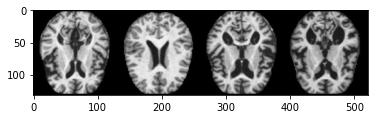

In [9]:
temp_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=0)
images_batch, label_batch = next(iter(temp_loader))
grid = utils.make_grid(images_batch)
plt.imshow(grid.numpy().transpose((1, 2, 0)))
[train_data.classes[x.item()] for x in label_batch]

use random split to partition and set the validation set

In [10]:
dataset_size = len(train_data)
percent_split = 0.75
train_size = int(dataset_size * percent_split)
val_size = dataset_size - train_size
train_set, val_set = torch.utils.data.random_split(train_data, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=True, num_workers=0)

now we'll repeat the steps with the test set folder

In [11]:
test_data = ImageFolder(folder_path + '/test',
                         transform=transforms.Compose([
                                                        transforms.Resize(140), 
                                                        transforms.CenterCrop(128),
                                                        transforms.Grayscale(),
                                                        transforms.ToTensor() 
                         ]))

In [12]:
dataset_size1 = len(test_data)
percent_split1 = 0.75
test_size = int(dataset_size1 * percent_split1)
val_size1 = dataset_size1 - test_size
test_set, val_set1 = torch.utils.data.random_split(test_data, [test_size, val_size1])
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=True, num_workers=0)
val_loader1 = torch.utils.data.DataLoader(val_set1, batch_size=128, shuffle=True, num_workers=0)

now we can define the CNN

In [13]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, stride=1, padding=1)
    self.fc1 = nn.Linear(in_features=8*32*32, out_features=10000)
    self.fc2 = nn.Linear(in_features=10000, out_features=500)
    self.fc3 = nn.Linear(in_features=500, out_features=4)
  def forward(self, _x):
    _x = self.pool(F.relu(self.conv1(_x)))
    _x = self.pool(F.relu(self.conv2(_x)))
    _x = _x.view(-1, 8*32*32)
    _x = F.relu(self.fc1(_x))
    _x = F.relu(self.fc2(_x))
    _x = self.fc3(_x)
    return _x

Now we can set parameters for the CNN

In [18]:
EPOCHS = 100
cnn_model = ConvNet()
cnn_model = cnn_model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=1e-3)

In [19]:
training_loss = []
validation_loss = []
validation_accuracy = []

In [ ]:
for epoch in range(EPOCHS):
  cnn_model.train()
  batch_loss = []
  for idx, (image_batch, label_batch) in enumerate(train_loader):
    image_batch = image_batch.to(device)
    label_batch = label_batch.to(device)
    pred_labels = cnn_model(image_batch)
    loss = loss_function(pred_labels, label_batch)
    batch_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    cnn_model.eval()
  
  def evaluate_model(data, model, loss_function):
    correct, total, val_acc = 0, 0, 0
    val_loss = []
    predictions = []
    for i, (inputs, labels) in enumerate(data, 0):
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      _, predicted = torch.max(outputs.data, 1)
 
      loss = loss_function(outputs, labels)
      val_loss.append(loss.item())
 
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      val_acc = correct/total
    mean_loss = sum(val_loss)/len(val_loss)
    return mean_loss, val_acc 

Now we can check for accuracy

In [ ]:
  val_loss, val_accuracy = evaluate_model(val_loader, cnn_model, loss_function)

  validation_loss.append(val_loss)
  validation_accuracy.append(val_accuracy)

  training_loss.append(sum(batch_loss)/len(batch_loss))
  print('training loss: {:.6f}'.format(training_loss[-1]))
  print('validation loss: {:.6f} | Validation accuracy: {:.2f}%'.format(val_loss, val_accuracy))

With ten epochs, I initilally had a the following results:
training loss: 0.135288
validation loss: 0.275170 | Validation accuracy: 0.91%

So I will up it to 100.

I keep running into issues with run time, the 100 epochs has been running for five hours and it hasn't completed. 

Update at 11pm -- the CNN has been running for about seven hours now and hasn't finished.
As of now I can't finish the assignment since it won't run with the higher number of epochs. I'll try again later if there is time before the assignment is graded and update the commits but for now this is what I have. 